In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-df/master/tips.csv")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

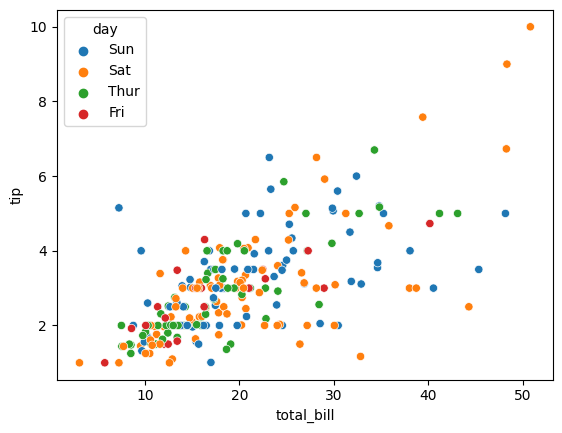

In [4]:
sns.scatterplot(x=df["total_bill"],y=df["tip"],hue=df["day"])

<Axes: xlabel='total_bill', ylabel='tip'>

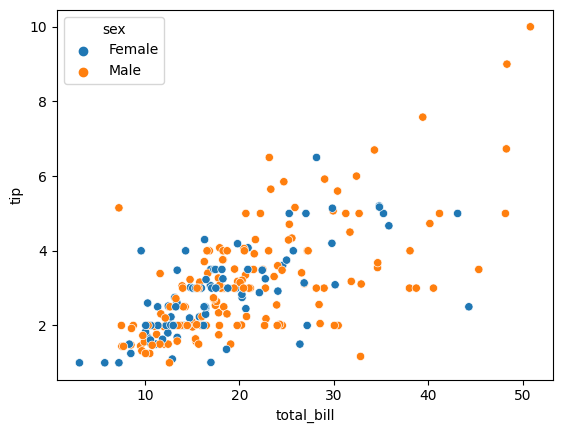

In [5]:
sns.scatterplot(x=df["total_bill"],y=df["tip"],hue=df["sex"])


<Axes: xlabel='total_bill', ylabel='tip'>

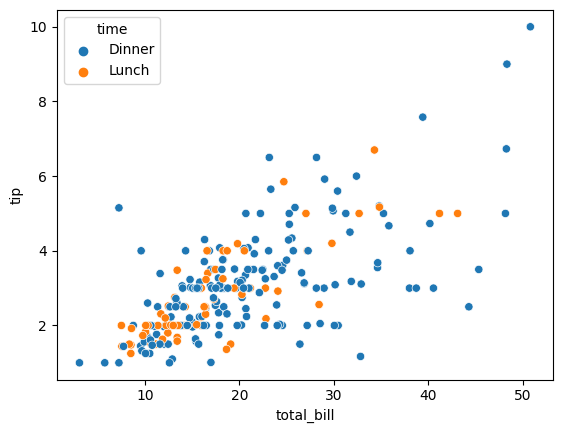

In [6]:
sns.scatterplot(x=df["total_bill"],y=df["tip"],hue=df["time"])

<Axes: xlabel='day', ylabel='tip'>

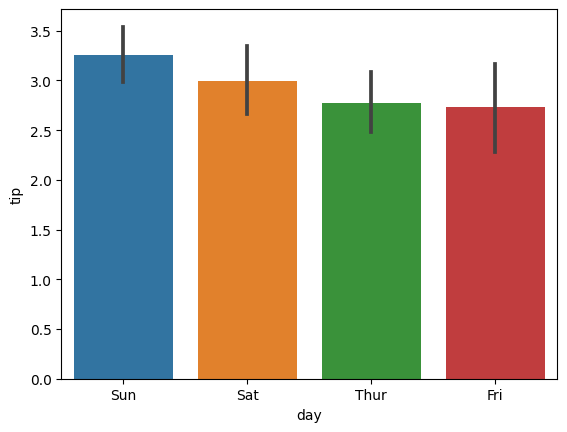

In [7]:
sns.barplot(x=df["day"],y=df["tip"])

In [8]:
df.groupby("day")["tip"].sum()

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

In [9]:
figure = px.pie(df, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

In [11]:
figure = px.pie(df, 
             values='tip', 
             names='sex',hole = 0.5)
figure.show()

In [13]:
figure = px.pie(df, 
             values='tip', 
             names='smoker',hole = 0.5)
figure.show()

C:\Users\Özdemir\AppData\Local\Temp\ipykernel_19376\1100720168.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Özdemir\AppData\Local\Temp\ipykernel_19376\1100720168.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='smoker'>

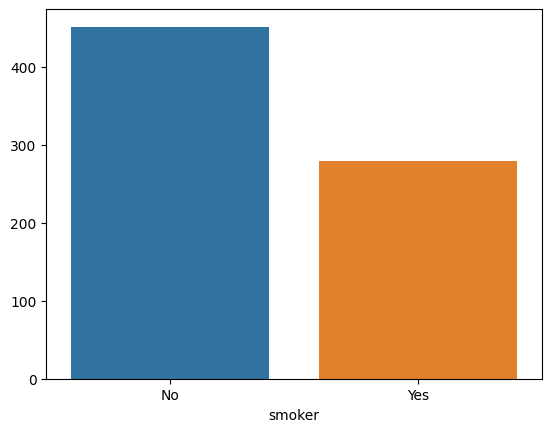

In [21]:
sns.barplot(x=df.groupby("smoker").sum()["tip"].index,y=df.groupby("smoker").sum()["tip"].values)

In [22]:
figure = px.pie(df, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

In [23]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [37]:
y = df["tip"]
x = df.drop("tip",axis=1)
x

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,3,1,2
1,10.34,1,0,3,1,3
2,21.01,1,0,3,1,3
3,23.68,1,0,3,1,2
4,24.59,0,0,3,1,4
...,...,...,...,...,...,...
239,29.03,1,0,2,1,3
240,27.18,0,1,2,1,2
241,22.67,1,1,2,1,2
242,17.82,1,0,2,1,2


In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
X_train

,total_bill,sex,smoker,day,time,size
114,25.71,0,0,3,1,3
65,20.08,1,0,2,1,3
132,11.17,0,0,0,0,2
207,38.73,1,1,2,1,4
162,16.21,0,0,3,1,3
...,...,...,...,...,...,...
106,20.49,1,1,2,1,2
14,14.83,0,0,3,1,2
92,5.75,0,1,1,1,2
179,34.63,1,1,3,1,2


In [40]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [41]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

c:\Users\Özdemir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([4.18545694])

In [44]:
y_pred = model.predict(X_test)

In [47]:
mean_absolute_error(Y_test,y_pred)

0.7559507395823504